In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
knn_100000 = pd.read_csv("../results/all_knn_static_v4_NO_100000.txt")
knn_100000['num_queries'] = "100000"

knnd_100000 = pd.read_csv("../results/all_knn_dynamic_v5_NO_100000.txt")
knnd_100000['num_queries'] = "100000d"

knn_100000 = pd.read_csv("../results/all_knn_static_v4_NO_100000.txt")
knn_100000['num_queries'] = "100000"

knn_500000 = pd.read_csv("../results/all_knn_static_v4_NO_500000.txt")
knn_500000['num_queries'] = "500000"

knn_1000000 = pd.read_csv("../results/all_knn_static_v4_NO_1000000.txt")
knn_1000000['num_queries'] = "1000000"

res = pd.concat([
    knn_100000,
    knnd_100000
    # knn_500000,
    # knn_1000000
])
res['ar'] = res['ar'].apply(lambda x: x if x <= 512 else 512)

res['name'] = res['num_queries'].apply(lambda x: "Descending (Continous)" if (x == "100000d") else "Descending (Once)")

res

,id,ar,currentLevel,x,y,num_queries,name
0,39120,0.555715,6,244.228231,54.982238,100000,Descending (Once)
1,16308,7.682393,3,225.351834,62.630760,100000,Descending (Once)
2,18770,512.000000,9,224.940523,37.903137,100000,Descending (Once)
3,51324,1.415628,6,247.770284,13.704416,100000,Descending (Once)
4,748,1.641157,4,241.934433,56.401783,100000,Descending (Once)
...,...,...,...,...,...,...,...
83317,62740,8.485857,8,244.141953,50.598756,100000d,Descending (Continous)
83318,2173,5.746843,8,246.576833,50.121523,100000d,Descending (Continous)
83319,30269,40.512793,5,222.417144,74.660201,100000d,Descending (Continous)
83320,43800,22.617920,5,244.712491,40.859050,100000d,Descending (Continous)


## Location Distribution

<AxesSubplot:xlabel='x', ylabel='y'>

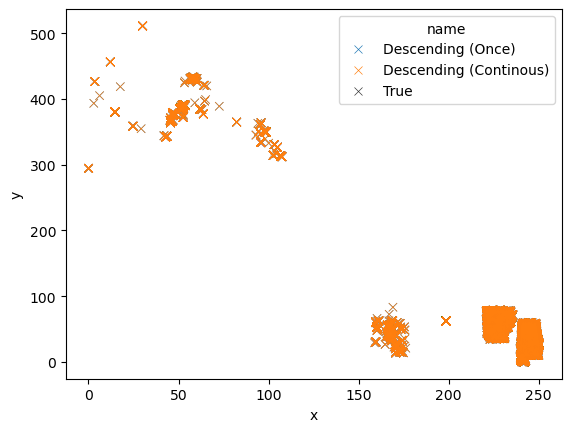

In [8]:
sns.scatterplot(x='x', y='y', data=res, hue='name', style=True, markers=['x'])

## Level Distribution

<AxesSubplot:xlabel='currentLevel', ylabel='count'>

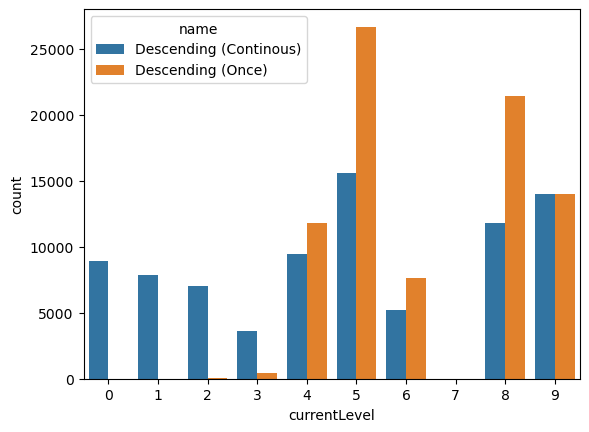

In [9]:
hist = res.value_counts(['name', 'currentLevel']).reset_index(name='count')
sns.barplot(x="currentLevel", y='count', hue='name', data=hist)

## Answer Region Distribution

<AxesSubplot:xlabel='ar', ylabel='Count'>

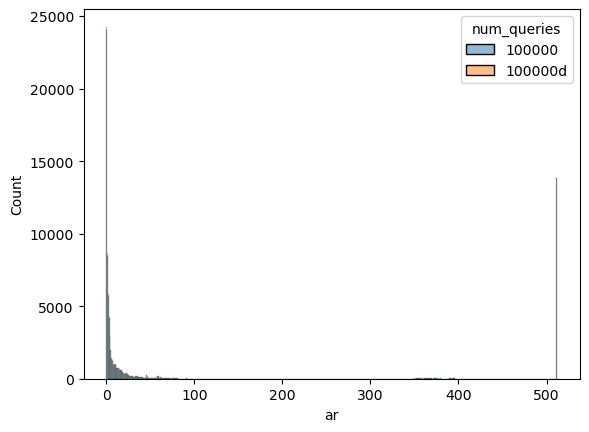

In [6]:
sns.histplot(x="ar", hue='num_queries', data=res)

(0.0, 500.0)

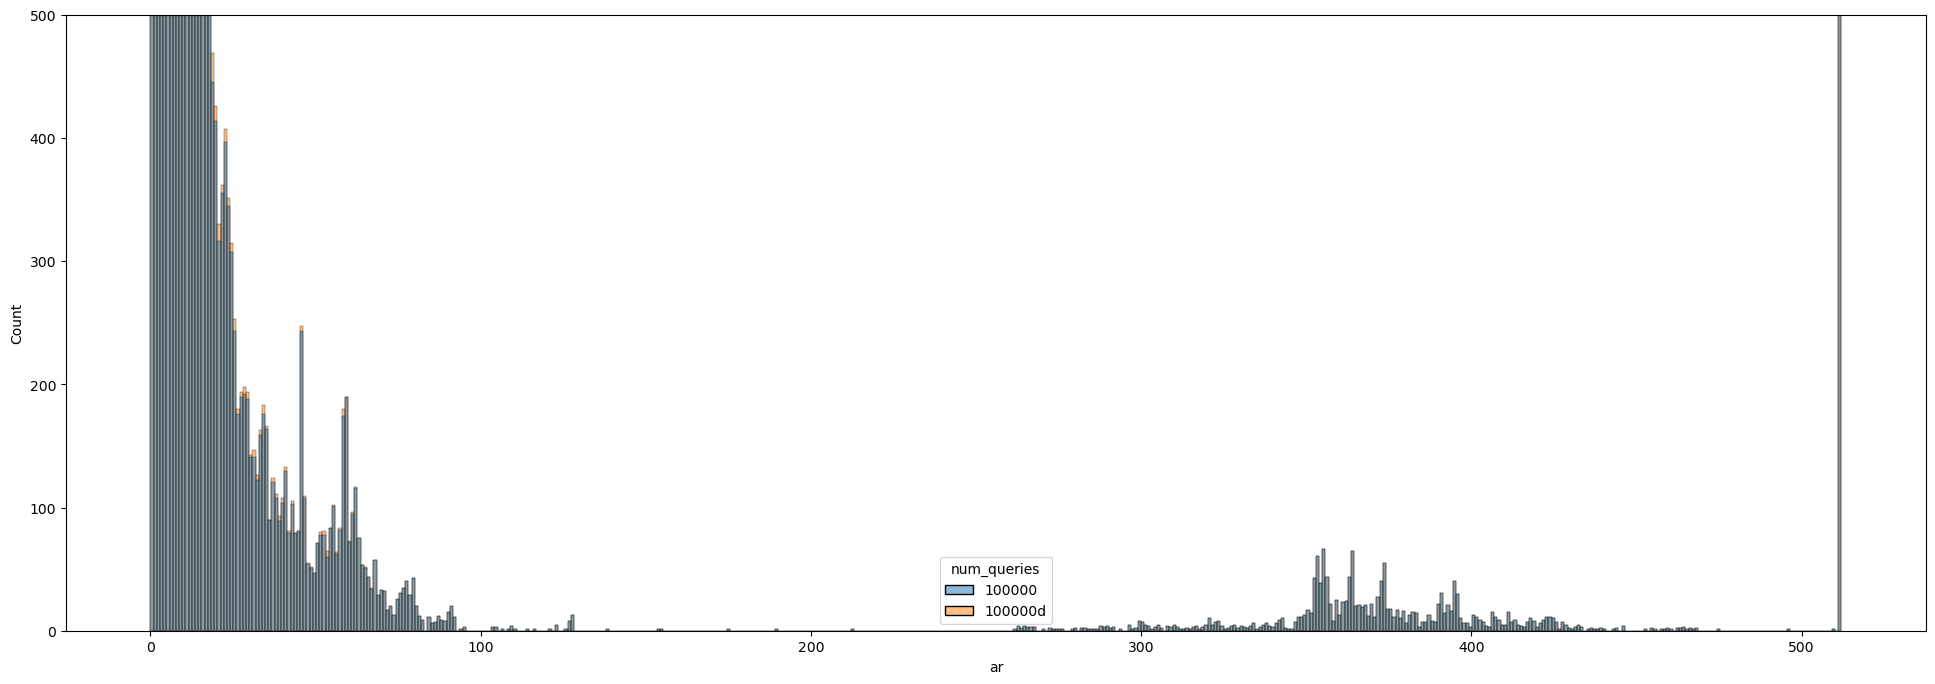

In [7]:
plt.figure(figsize=(24, 8))
sns.histplot(x="ar", hue='num_queries', data=res)
plt.ylim((0,500))
